In [18]:
import pandas  as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib notebook
%matplotlib inline

In [19]:
df1 = pd.read_csv('/home/manasd28/Desktop/e-marketplace/dataset/cleansed_data/amazon/laptop.csv').iloc[:, 1:]
df2 = pd.read_csv('/home/manasd28/Desktop/e-marketplace/dataset/cleansed_data/flipcart/laptop.csv').iloc[:, 1:]
df1['display'] = np.nan
df2['graphic_card'] = np.nan

In [20]:
df2 = df2[['Title', 'Price', 'Rating', 'Link', 'Company', 'Processor',
       'ssd', 'hdd', 'ram', 'graphic_card', 'Display']]

In [21]:
columns = ['title', 'price', 'rating', 'url', 'brand', 'processor', 'ssd', 'hdd', 'ram', 'graphic_card', 'display']

In [22]:
df1.columns = columns
df2.columns = columns
df1['source'] = 'amazon'
df2['source'] = 'flipcart'

In [23]:
df = df1.append(df2).replace([' ', ''], np.nan)

In [24]:
df['rating'] = df['rating'].apply(lambda x: round(np.random.normal(3, 0.8), 1) if x!=x else x)
df = df.applymap(lambda s: s.lower() if type(s) == str else s)

# Brand Analysis



/home/manasd28/.anaconda3/envs/ds_tf/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


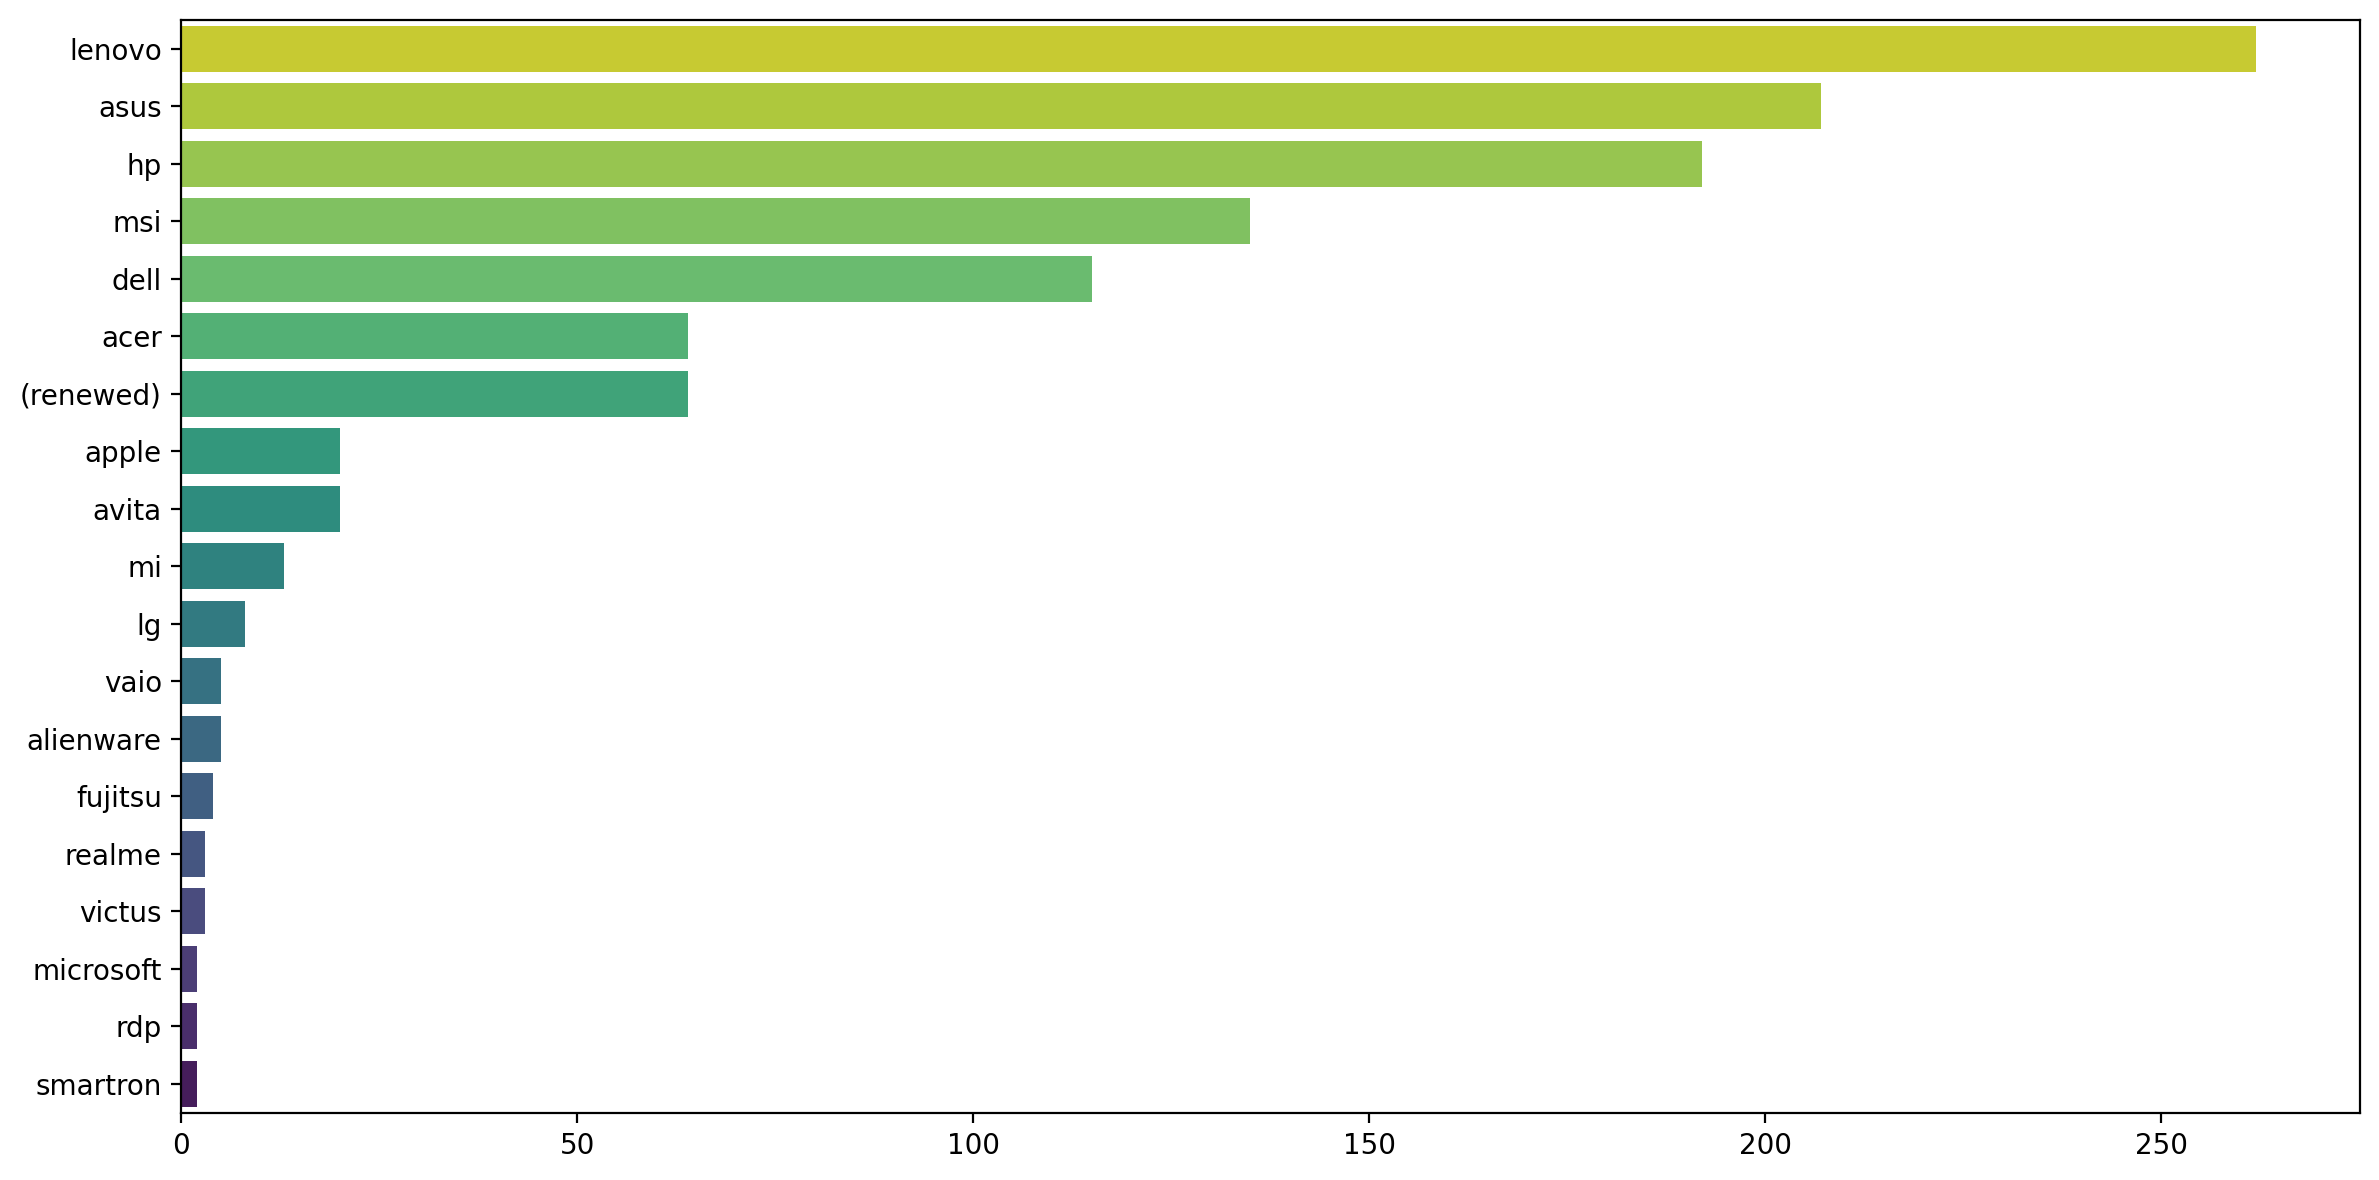

In [25]:
plt.figure(dpi = 200, figsize = (12, 6))
cnt = pd.value_counts(df['brand'])[:-5]
sns.barplot(cnt.values, cnt.index, palette = sns.color_palette('viridis_r', n_colors = len(cnt)))
plt.tight_layout()

In [39]:
up = np.quantile(df.price, 0.75)
lb = np.quantile(df.price, 0.25)
df['budget'] = df['price'].apply(lambda x: 'low' if x<lb else 'medium' if x<up else 'high')

In [27]:
ndf = pd.DataFrame()
for ind, frame in df.groupby(['brand']):
    cnt = {}
    for n, c in pd.value_counts(frame['budget']).iteritems():
        cnt[n] = c
    ndf = ndf.append(pd.Series(data = cnt.values(), index = cnt.keys(), name = ind))
ndf = ndf.iloc[3:,:].fillna(0)[['low', 'medium', 'high']]

<AxesSubplot:>

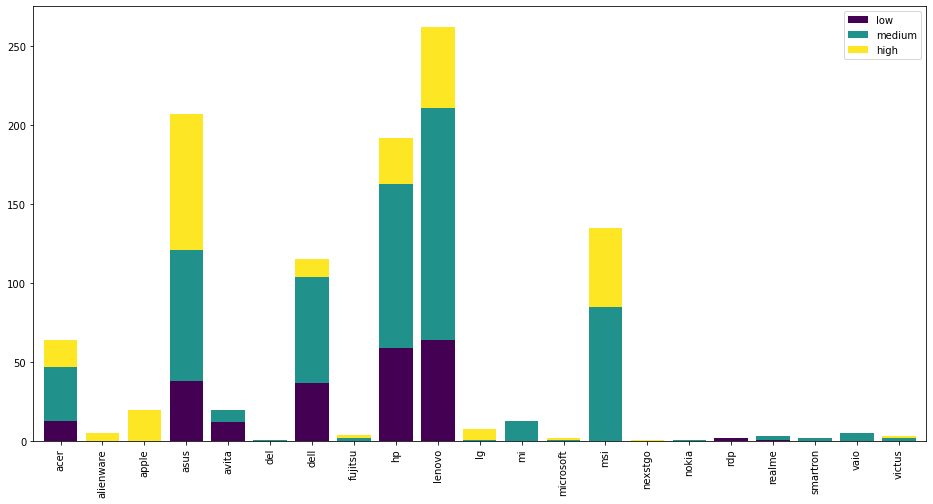

In [28]:
ndf.plot(kind = 'bar', stacked = True, figsize = (16, 8), colormap = sns.color_palette('viridis', n_colors = len(ndf), as_cmap = True), width = 0.8)

In [29]:
ndf = pd.DataFrame()
for ind, frame in df.groupby(['brand']):
    cnt = {}
    for n, c in pd.value_counts(frame['processor']).iteritems():
        cnt[n] = c
    ndf = ndf.append(pd.Series(data = cnt.values(), index = cnt.keys(), name = ind))
ndf = ndf.iloc[3:,:].fillna(0)

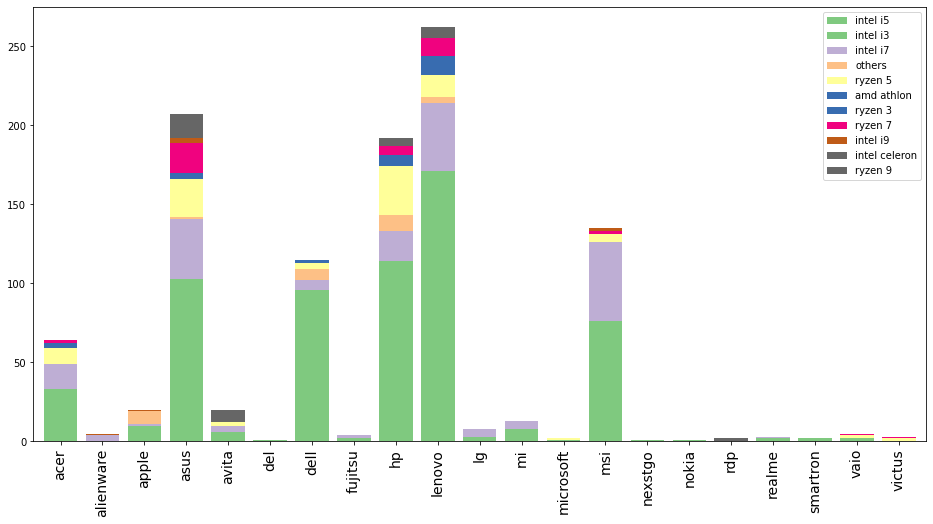

In [30]:
ax = ndf.plot(kind = 'bar', stacked = True, figsize = (16, 8), colormap = sns.color_palette('Accent', as_cmap = True), width = 0.8)
xticklabels = ax.get_xticklabels()
ax.set_xticklabels(xticklabels, size = 14)
plt.show()

In [31]:
ndf = pd.pivot_table(data = df, values = 'title', index = 'ram', columns = 'processor', aggfunc = pd.Series.nunique).fillna(0).transform(np.sqrt)

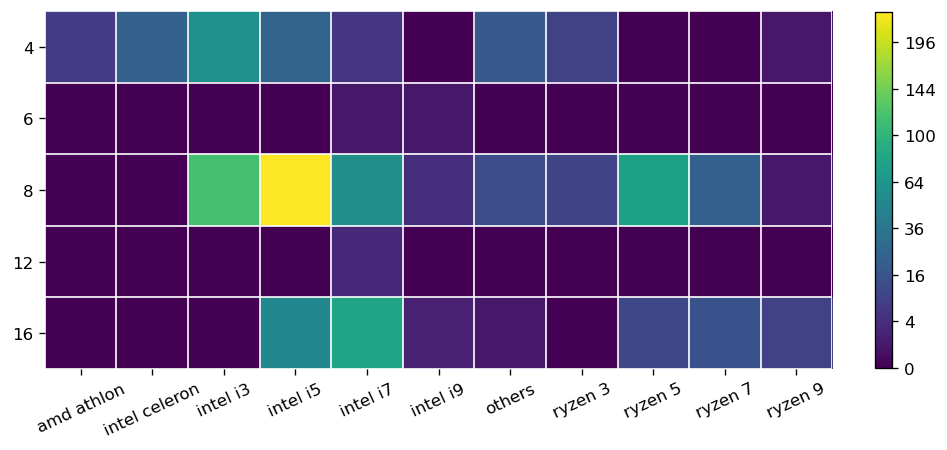

In [32]:
plt.figure(dpi = 120, figsize = (8, 6))
img = plt.imshow(ndf, cmap = sns.color_palette('viridis', as_cmap = True))
ax = plt.gca()

ax.set_yticks(range(5))
ax.set_yticklabels(ndf.index)
ax.set_xticks(range(11))
ax.set_xticklabels(ndf.columns)
plt.xticks(rotation = 25)
cbar = ax.figure.colorbar(img, fraction = 0.021)
cbar.set_ticks(cbar.ax.get_yticks())
xticklabels = cbar.ax.get_yticks()
cbar.ax.set_yticklabels(list(map(int, xticklabels**2)))

ax.spines[:].set_visible(False)
ax.set_xticks(np.arange(ndf.shape[1]+1)-.5, minor=True)
ax.set_yticks(np.arange(ndf.shape[0]+1)-.5, minor=True)
ax.grid(which="minor", color="w", linestyle='-', linewidth=1)
ax.tick_params(which="minor", bottom=False, left=False)

plt.tight_layout()
plt.show()

/home/manasd28/.anaconda3/envs/ds_tf/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='ssd'>

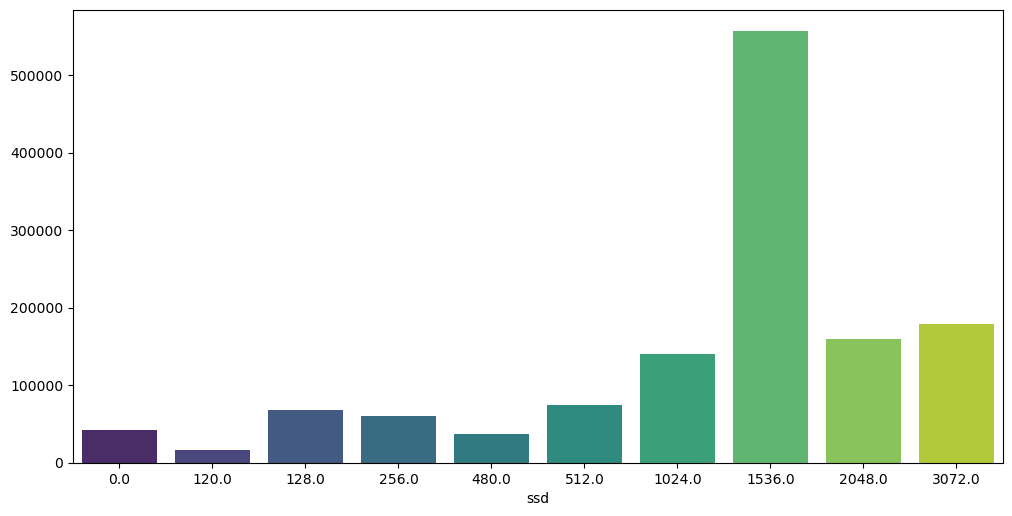

In [33]:
ndf = df.groupby('ssd').mean()['price']
plt.figure(figsize = (12, 6), dpi = 100)
sns.barplot(ndf.index, ndf.values, palette = 'viridis')

/home/manasd28/.anaconda3/envs/ds_tf/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='brand'>

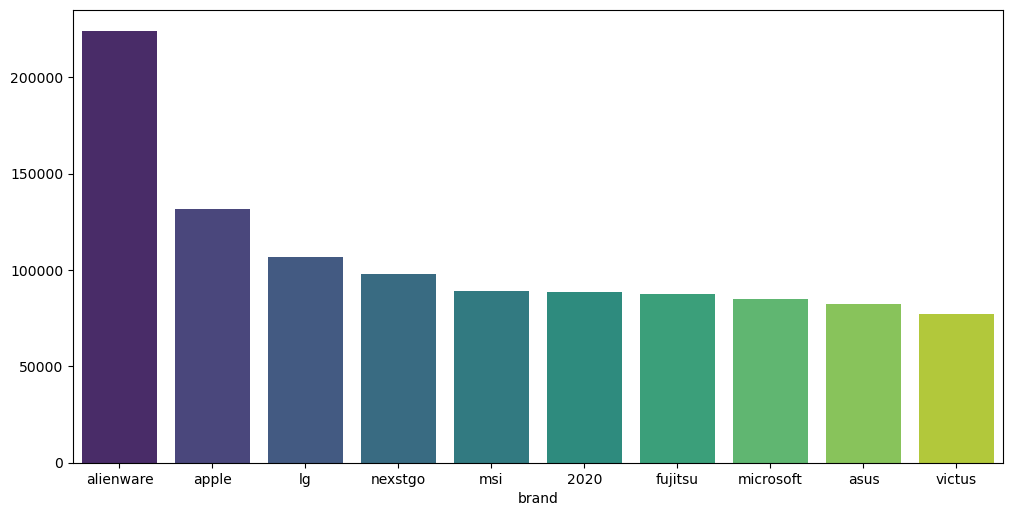

In [40]:
ndf = df.groupby('brand').mean()['price'].sort_values(ascending = False).iloc[:10]
plt.figure(figsize = (12, 6), dpi = 100)
sns.barplot(ndf.index, ndf.values, palette = 'viridis')

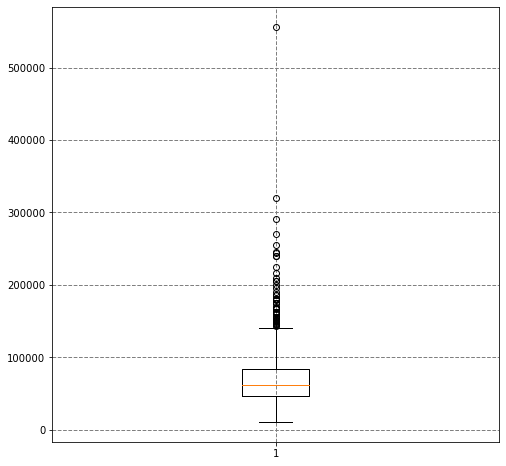

In [41]:
plt.figure(figsize = (8, 8))
plt.boxplot(df.price)
ax = plt.gca()
ax.grid(which="major", color="grey", linestyle='--', linewidth=1)
plt.show()

In [42]:
df.head()

,title,price,rating,url,brand,processor,ssd,hdd,ram,graphic_card,display,source,budget
0,hp pavilion 14 11th gen intel core i5 14-inch ...,62990,4.2,https://m.media-amazon.com/images/i/61vqnqvhpt...,hp,intel i5,512.0,0.0,8,intel integrated,NaN,amazon,medium
1,hp pavilion 11th gen intel core i5 processor 1...,71990,1.8,https://m.media-amazon.com/images/i/71hmqiqjfd...,hp,intel i5,512.0,0.0,16,mx450,NaN,amazon,medium
2,"dell inspiron 3502 15.6"" (39.62 cms) hd displa...",40126,4.2,https://m.media-amazon.com/images/i/51jpuwqqtf...,dell,others,256.0,0.0,4,intel integrated,NaN,amazon,low
3,hp chromebook 14-inch (35.56 cms) thin & light...,27999,3.8,https://m.media-amazon.com/images/i/613wulner1...,hp,intel celeron,0.0,0.0,4,1000m,NaN,amazon,low
4,acer aspire 3 amd athlon silver 3050u dual-cor...,30535,3.1,https://m.media-amazon.com/images/i/713qk2mtm0...,acer,amd athlon,0.0,1024.0,4,amd radeon,NaN,amazon,low


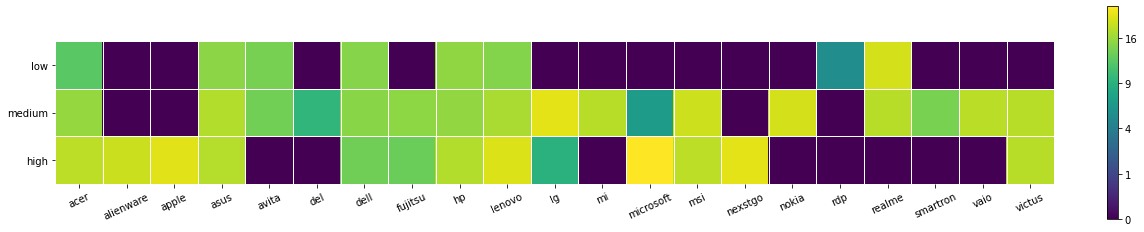

In [45]:
df['rating'] = list(map(float, df['rating']))
plt.figure(figsize = (16, 8))
ndf = pd.pivot_table(data = df, values = 'rating', index = 'brand', columns = 'budget', aggfunc = np.mean).iloc[3:,:].fillna(0)
ndf = ndf[['low', 'medium', 'high']].T
img = plt.imshow(ndf, cmap = sns.color_palette('viridis', as_cmap = True))
ax = plt.gca()

ax.set_yticks(range(3))
ax.set_yticklabels(ndf.index)
ax.set_xticks(range(21))
ax.set_xticklabels(ndf.columns)
plt.xticks(rotation = 25)
cbar = ax.figure.colorbar(img, fraction = 0.01)
cbar.set_ticks(cbar.ax.get_yticks())
xticklabels = cbar.ax.get_yticks()
cbar.ax.set_yticklabels(list(map(int, xticklabels**2)))

ax.spines[:].set_visible(False)
ax.set_xticks(np.arange(ndf.shape[1]+1)-.5, minor=True)
ax.set_yticks(np.arange(ndf.shape[0]+1)-.5, minor=True)
ax.grid(which="minor", color="w", linestyle='-', linewidth=1)
ax.tick_params(which="minor", bottom=False, left=False)

plt.tight_layout()
plt.show()

# Mobile EDA

In [46]:
df1 = pd.read_csv('/home/manasd28/Desktop/e-marketplace/dataset/cleansed_data/flipcart/phone.csv').iloc[:, 2:]
df2 = pd.read_csv('/home/manasd28/Desktop/e-marketplace/dataset/cleansed_data/amazon/phone.csv').iloc[:, 2:]

In [47]:
displays = [ 6.53 ,  6.5  ,  6.6  ,  6.78 ,  6.82 ,  6.52 ,  6.1  ,
        1.77 ,  6.515,  6.4  ,  6.51 ,  2.8  ,  6.22 ,  5.4  ,  1.8  ,
        6.517,  6.67 ,  2.4  ,  5.45 ,  2.6  ,  6.08 ,  0.66 ,  6.58 ,
        4.7  ,  6.43 ,  1.7  ,  6.62 ,  1.44 ,  6.95 ,  1.4  ,  6.7  ,
        6.55 ,  5.7  ,  1.54 ,  6.088,  6.8  ,  6.44 ,  5.   ,  6.3  ,
        6.39 ,  2.2  ,  5.81 ,  5.5  ,  6.26 ,  3.5  ,  6.56 ,  6.49 ,
        6.9  ,  6.19 ,  6.2  ,  6.   ,  1.3  ,  1.75 ,  5.71 , 66.   ,
        7.6  ,  2.   ,  5.99 ,  6.65 ,  6.57 ,  6.102,  6.35 ]
price_values = {1:16, 2:32, 3:64, 4:128, 5:256, 6:512}
df2['budget'] = pd.qcut(df2['PRODUCT PRICE'], 6, [1,2,3,4,5,6])
df2['storage'] = df2['budget'].map(price_values)
df2['display'] = [random.choices(displays)[0] for i in range(len(df2))]
df2 = df2[['PRODUCT RATING', 'URL', 'display', 'brand', 'PRODUCT PRICE', 'storage', 
          'ram', 'rom']]
df1.drop('Battery', axis = 1, inplace = True)
df2['source'] = 1
df1['source'] = 0

In [48]:
columns = ['rating', 'url', 'display', 'brand', 'price', 'storage', 'ram', 'rom', 'source']
df1.columns = columns
df2.columns = columns

In [49]:
df = df1.append(df2)

In [50]:
df['rating'] = df['rating'].apply(lambda x: round(np.random.normal(3, 0.8), 1) if x!=x else x)
df = df.applymap(lambda s: s.lower() if type(s) == str else s)

In [51]:
up = np.quantile(df.price, 0.75)
lb = np.quantile(df.price, 0.25)
df['budget'] = df['price'].apply(lambda x: 'low' if x<lb else 'medium' if x<up else 'high')

/home/manasd28/.anaconda3/envs/ds_tf/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


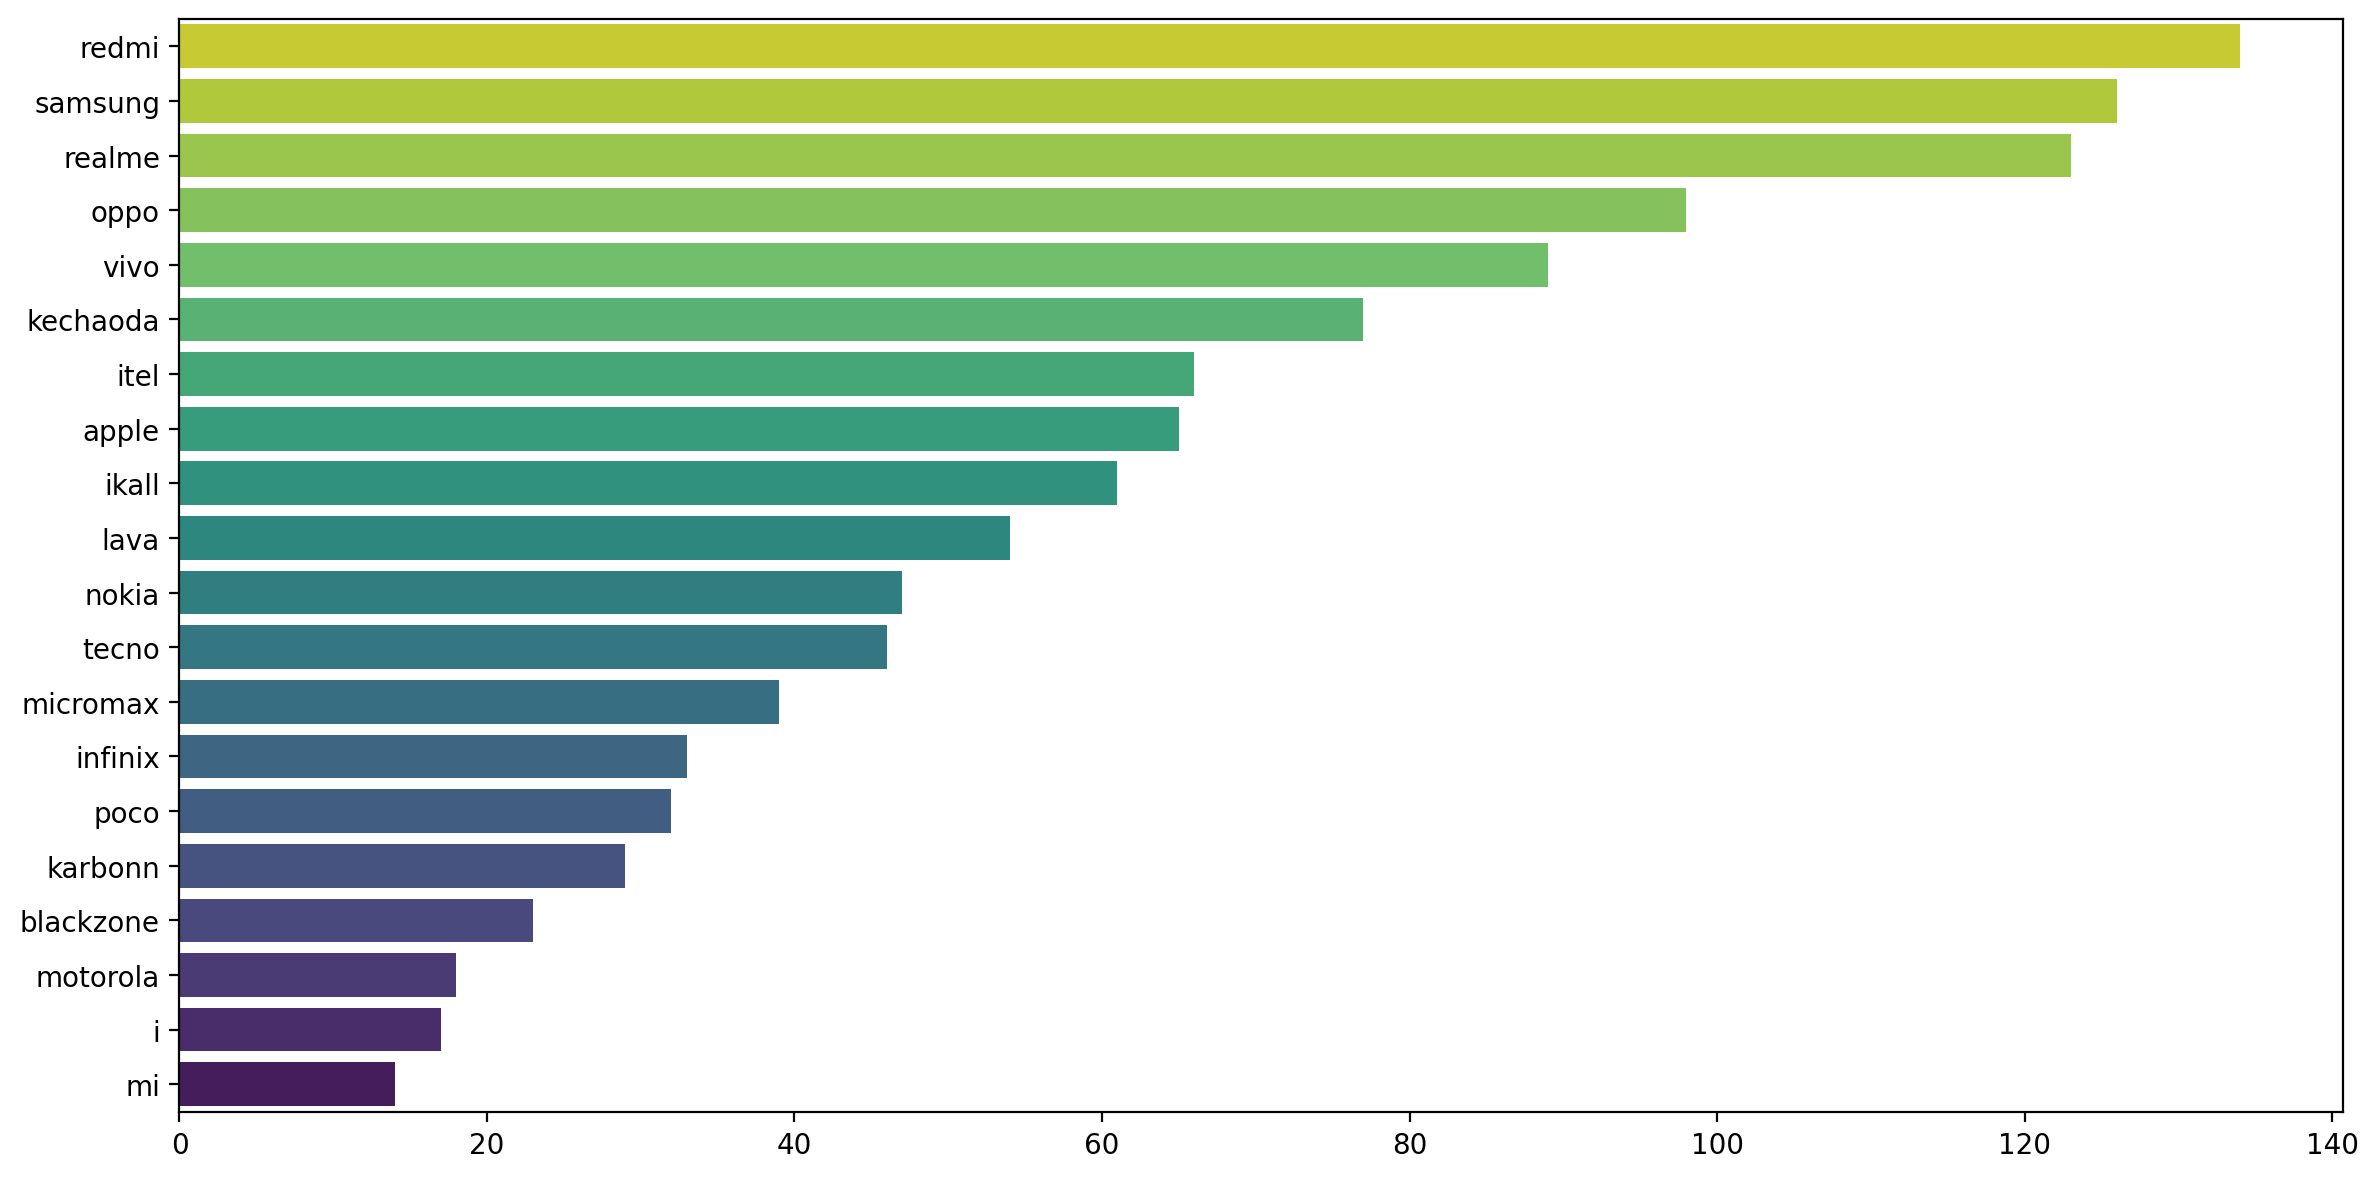

In [52]:
plt.figure(dpi = 200, figsize = (12, 6))
cnt = pd.value_counts(df['brand'])[:20]
sns.barplot(cnt.values, cnt.index, palette = sns.color_palette('viridis_r', n_colors = len(cnt)))
plt.tight_layout()

In [53]:
ndf = pd.DataFrame()
for ind, frame in df.groupby(['brand']):
    cnt = {}
    for n, c in pd.value_counts(frame['budget']).iteritems():
        cnt[n] = c
    ndf = ndf.append(pd.Series(data = cnt.values(), index = cnt.keys(), name = ind))
ndf = ndf.iloc[3:,:].fillna(0)[['low', 'medium', 'high']]

<AxesSubplot:>

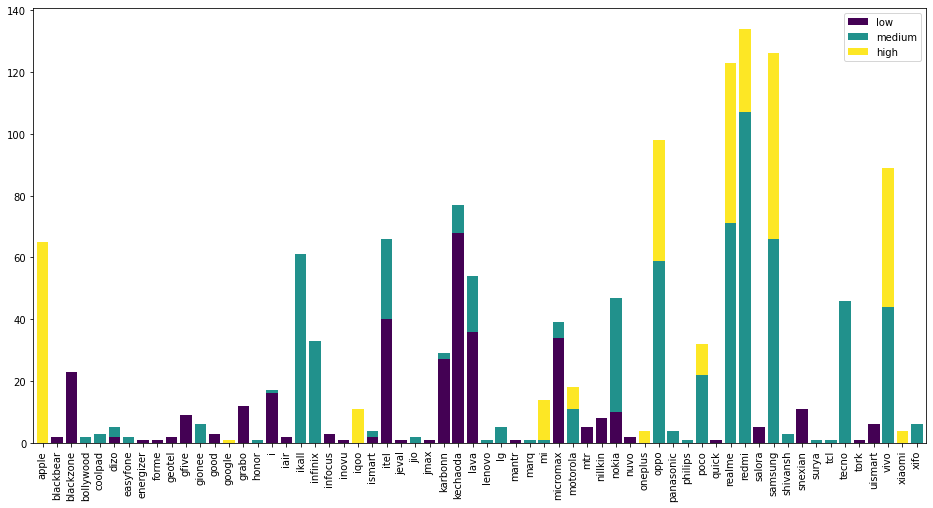

In [54]:
ndf.plot(kind = 'bar', stacked = True, figsize = (16, 8), colormap = sns.color_palette('viridis', n_colors = len(ndf), as_cmap = True), width = 0.8)

In [55]:
ndf = pd.DataFrame()
for ind, frame in df.groupby(['brand']):
    cnt = {}
    for n, c in pd.value_counts(frame['ram']).iteritems():
        cnt[n] = c
    ndf = ndf.append(pd.Series(data = cnt.values(), index = cnt.keys(), name = ind))
ndf = ndf.iloc[3:,:].fillna(0)

/home/manasd28/.anaconda3/envs/ds_tf/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


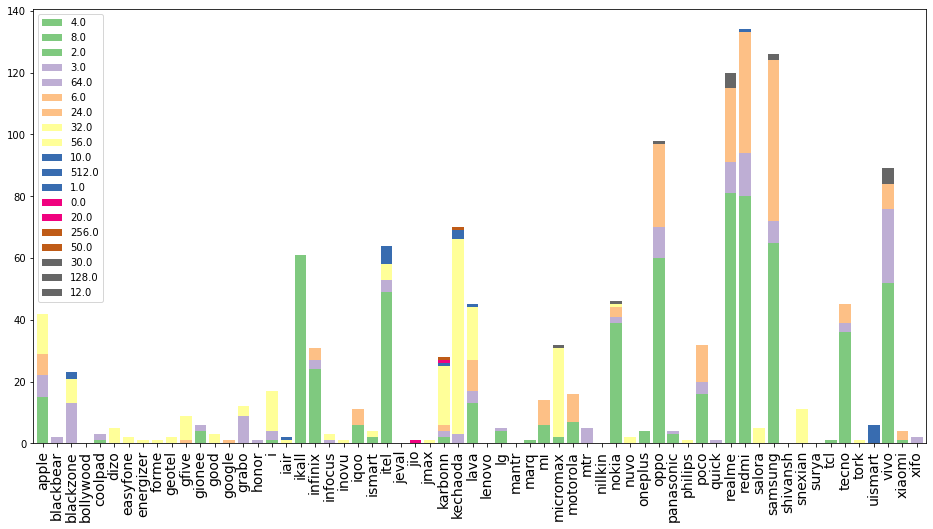

In [56]:
ax = ndf.plot(kind = 'bar', stacked = True, figsize = (16, 8), colormap = sns.color_palette('Accent', as_cmap = True), width = 0.8)
xticklabels = ax.get_xticklabels()
ax.set_xticklabels(xticklabels, size = 14)
plt.show()

In [57]:
ndf = pd.pivot_table(data = df, values = 'url', index = 'ram', columns = 'storage', aggfunc = pd.Series.nunique).fillna(0).transform(np.sqrt).T

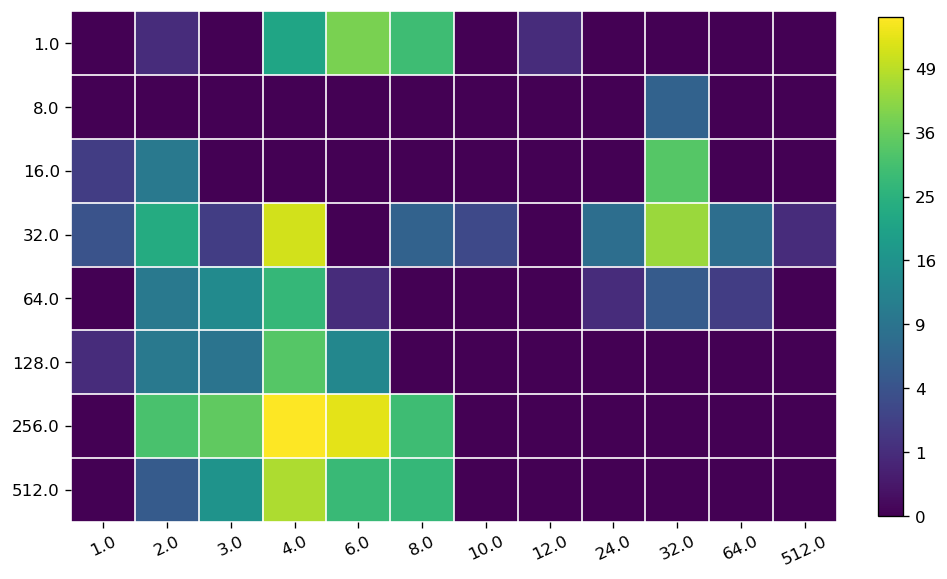

In [58]:
plt.figure(dpi = 120, figsize = (8, 6))
img = plt.imshow(ndf, cmap = sns.color_palette('viridis', as_cmap = True))
ax = plt.gca()

ax.set_yticks(range(len(ndf)))
ax.set_yticklabels(ndf.index)
ax.set_xticks(range(len(ndf.columns)))
ax.set_xticklabels(ndf.columns)
plt.xticks(rotation = 25)
cbar = ax.figure.colorbar(img, fraction = 0.03)
cbar.set_ticks(cbar.ax.get_yticks())
xticklabels = cbar.ax.get_yticks()
cbar.ax.set_yticklabels(list(map(int, xticklabels**2)))

ax.spines[:].set_visible(False)
ax.set_xticks(np.arange(ndf.shape[1]+1)-.5, minor=True)
ax.set_yticks(np.arange(ndf.shape[0]+1)-.5, minor=True)
ax.grid(which="minor", color="w", linestyle='-', linewidth=1)
ax.tick_params(which="minor", bottom=False, left=False)

plt.tight_layout()
plt.show()

In [59]:
df.head()

,rating,url,display,brand,price,storage,ram,rom,source,budget
0,4.4,https://rukminim1.flixcart.com/image/312/312/k...,6.53,redmi,8499.0,512.0,4.0,64.0,0,medium
1,4.4,https://rukminim1.flixcart.com/image/312/312/k...,6.50,realme,9999.0,256.0,4.0,64.0,0,medium
2,4.4,https://rukminim1.flixcart.com/image/312/312/k...,6.50,realme,8999.0,256.0,3.0,32.0,0,medium
3,4.4,https://rukminim1.flixcart.com/image/312/312/k...,6.50,realme,9999.0,256.0,4.0,64.0,0,medium
4,4.4,https://rukminim1.flixcart.com/image/312/312/k...,6.50,realme,8999.0,256.0,3.0,32.0,0,medium


/home/manasd28/.anaconda3/envs/ds_tf/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='ram'>

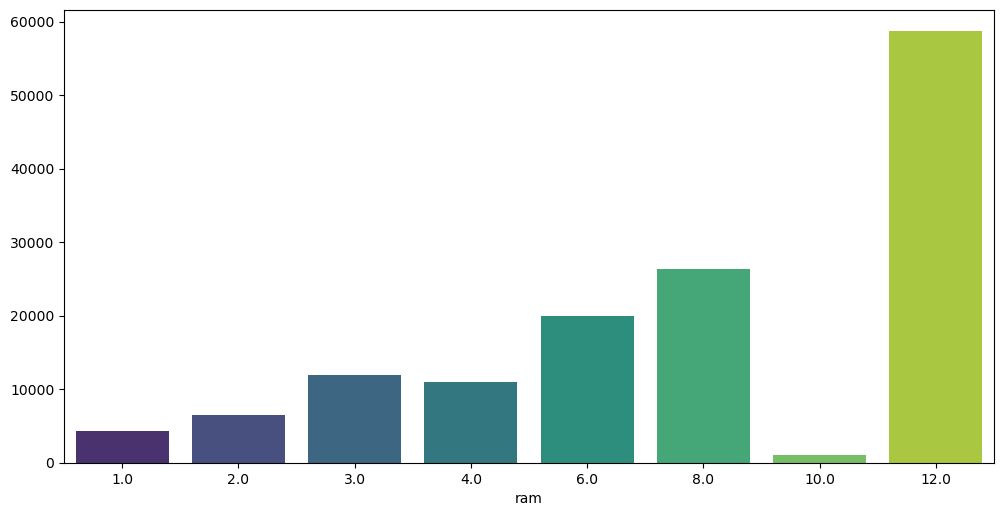

In [60]:
ndf = df.groupby('ram').mean()['price'].iloc[1:9]
plt.figure(figsize = (12, 6), dpi = 100)
sns.barplot(ndf.index, ndf.values, palette = 'viridis')

/home/manasd28/.anaconda3/envs/ds_tf/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='brand'>

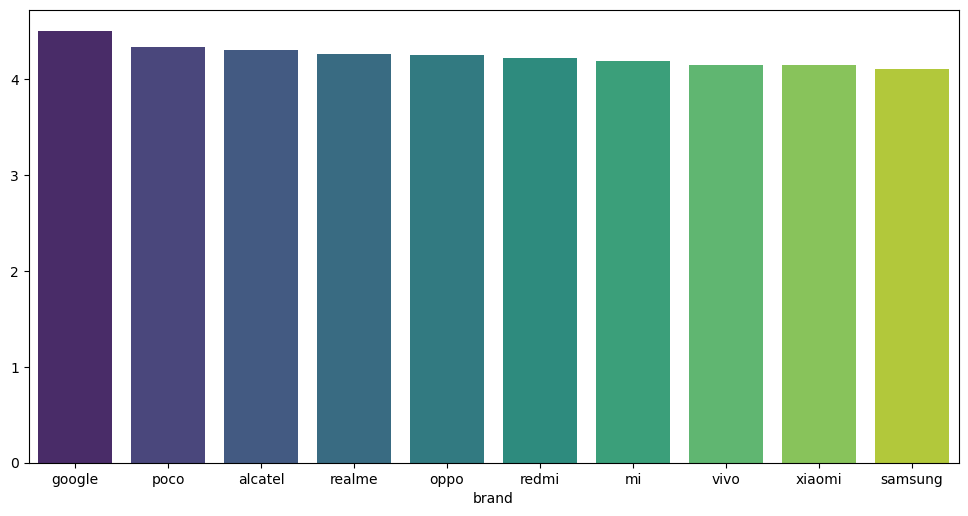

In [63]:
ndf = df.groupby('brand').mean()['rating'].sort_values(ascending = False).iloc[:10]
plt.figure(figsize = (12, 6), dpi = 100)
sns.barplot(ndf.index, ndf.values, palette = 'viridis')

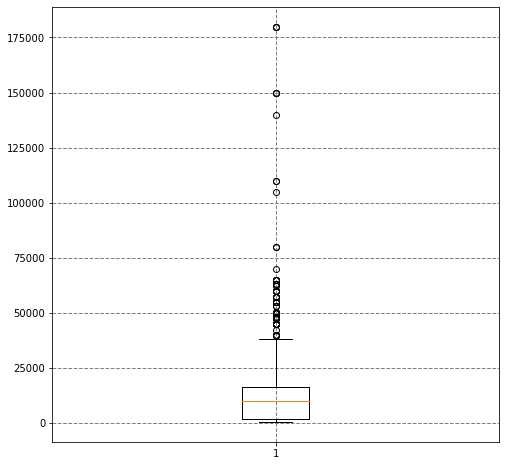

In [64]:
plt.figure(figsize = (8, 8))
plt.boxplot(df.price)
ax = plt.gca()
ax.grid(which="major", color="grey", linestyle='--', linewidth=1)
plt.show()

/home/manasd28/.anaconda3/envs/ds_tf/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='brand'>

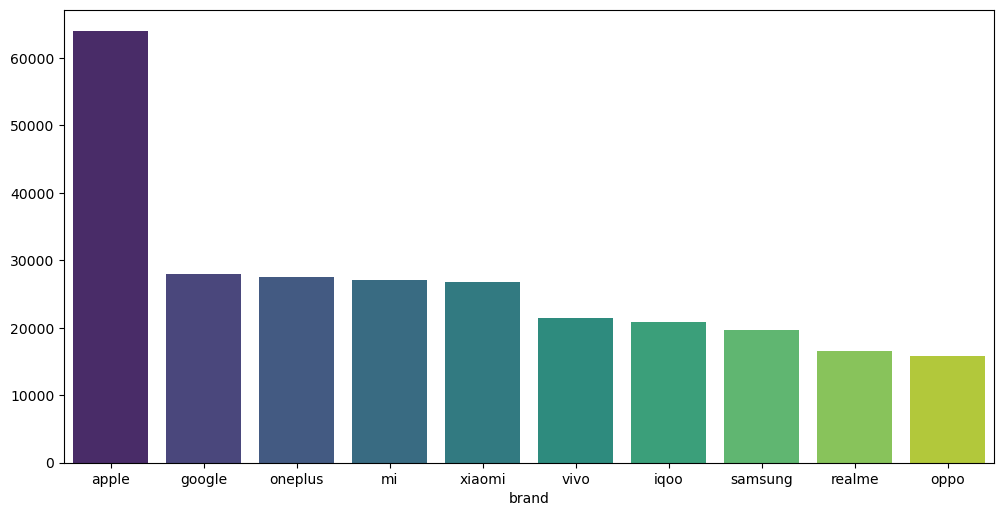

In [87]:
ndf = df.groupby('brand').mean()['price'].sort_values(ascending = False).iloc[:10]
plt.figure(figsize = (12, 6), dpi = 100)
sns.barplot(ndf.index, ndf.values, palette = 'viridis')

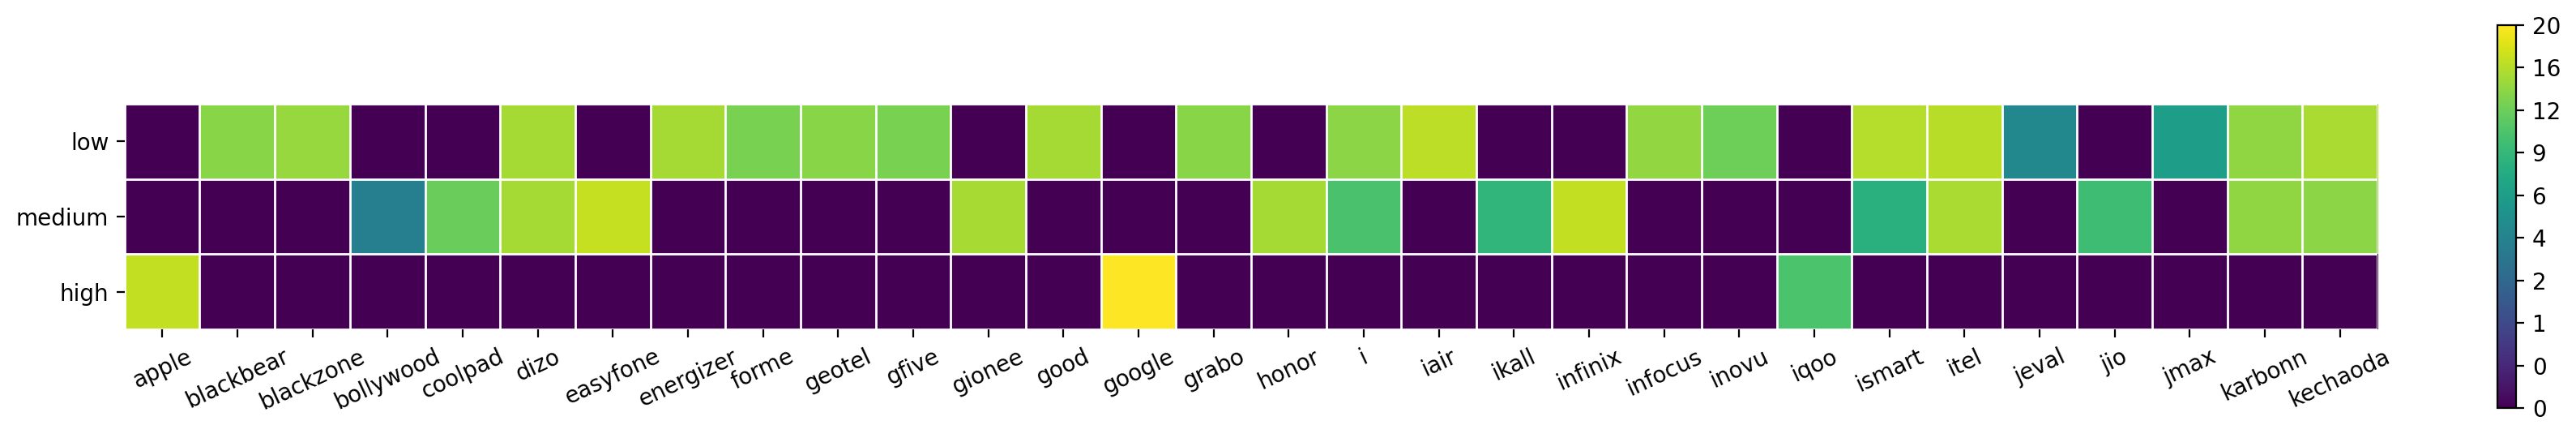

In [89]:
df['rating'] = list(map(float, df['rating']))
plt.figure(figsize = (16, 8), dpi = 200)
ndf = pd.pivot_table(data = df, values = 'rating', index = 'brand', columns = 'budget', aggfunc = np.mean).iloc[3:,:].fillna(0)
ndf = ndf[['low', 'medium', 'high']].T.iloc[:, :30]
img = plt.imshow(ndf, cmap = sns.color_palette('viridis', as_cmap = True))
ax = plt.gca()


ax.set_yticks(range(ndf.shape[0]))
ax.set_yticklabels(ndf.index)
ax.set_xticks(range(ndf.shape[1]))
ax.set_xticklabels(ndf.columns)
plt.xticks(rotation = 25)
cbar = ax.figure.colorbar(img, fraction = 0.008)
cbar.set_ticks(cbar.ax.get_yticks())
xticklabels = cbar.ax.get_yticks()
cbar.ax.set_yticklabels(list(map(int, xticklabels**2)))

ax.spines[:].set_visible(False)
ax.set_xticks(np.arange(ndf.shape[1]+1)-.5, minor=True)
ax.set_yticks(np.arange(ndf.shape[0]+1)-.5, minor=True)
ax.grid(which="minor", color="w", linestyle='-', linewidth=1)
ax.tick_params(which="minor", bottom=False, left=False)

plt.tight_layout()
plt.show()